# Project 3: NLP Classification of Two Topics (Marvel Cinematic Universe vs DC Extended Universe)

# 03: Preprocessing and Exploratatory Data Analysis (EDA)

In this notebook, we will process the data and conduct exploratory data analysis by looking at common words. 

## Import Libraries

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re

In [2]:
# Set all columns and rows to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [3]:
# Import Marvel data
marvel = pd.read_csv('../data/marvel_clean.csv')

# Import DCEU data
dceu = pd.read_csv('../data/dceu_clean.csv')

## Process Data for Exploratory Data Analysis

Here, we will process the text data by combining the title and text columns, cleaning them further, tokenizing them and finally lemmatizing them. A description in more detail is provided below.
* Cleaning to remove special characters
* Tokenizing (converts sentences into individual words, by using ngrams, we can also form tokens with multiple words to give better context)
* Lemmatization (converts different words with the same meaning/intent into the same word)
* Stop word removal (stop words are filler words that do not provide any context and just assist with sentence structure)

### Combining the title and text columns

As our eventual goal is to tokenize all the words, we will first combine the columns $title$ and $text$ into $post$

In [4]:
# Combine the columns title and text into post
marvel['post'] = marvel['title'] + marvel['text']

In [5]:
# Drop the columns title and post
marvel.drop(columns=['title', 'text'], inplace=True)

In [6]:
# Combine the columns title and text into post
dceu['post'] = dceu['title'] + dceu['text']

In [7]:
# Drop the columns title and post
dceu.drop(columns=['title', 'text'], inplace=True)

### Define the functions we need to process the data

Here, we will define functions to clean, tokenize, lemmatize and remove stop words.

In [8]:
# Function to clean the data
def clean_data(post):
    
    # Remove 's
    post = re.sub(r"'s", '', post)
    
    # Remove n't (example don't)
    post = re.sub(r"n't", '', post)
    
    # Remove 'm (example I'm)
    post = re.sub(r"'m", '', post)
    
    # Remove 'd (e.g. I'd)
    post = re.sub(r"'d", '', post)
    
    # Remove 're (example They're)
    post = re.sub(r"'re", '', post)
    
    # Remove 've (example They've)
    post = re.sub(r"'ve", " have", post)
    
    # Remove 'll (example We'll)
    post = re.sub(r"'ll", '', post)
    
    # For the term S.H.I.E.L.D, change to SHIELD
    post = re.sub(r"S.H.I.E.L.D", 'SHIELD', post)
    
    # Remove URL links
    post = re.sub(r'http\S+', '', post)
    
    # Remove numbers
    post = re.sub(r'd+', '', post)
    
    # Change all text to lower case
    post = post.lower()
    
    return post

In [9]:
# Function to tokenize the data
def tokenize(post):
    # Tokenize the data by removing whitespace
    tokenizer = RegexpTokenizer(r'\w+')
    post = tokenizer.tokenize(post)
    
    return post

In [10]:
# Function to lemmatize the data
def lemmatize(post):
    lemmatizer = WordNetLemmatizer()
    post = [lemmatizer.lemmatize(i) for i in post]
    
    return post

In [11]:
# Function to remove stop words
def remove_stop_words(post):
    post = [token for token in post if token not in stopwords.words('english')]
    
    return post

In [12]:
def remove_common_words(post):
    post = [token for token in post if token not in stop_words]
    
    return post

### Clean, Tokenize, Lemmatize and Remove Stop Words for Marvel

In [13]:
# Clean the text
marvel['tokens'] = marvel['post'].apply(clean_data)

# Tokenize the text
marvel['tokens'] = marvel['tokens'].apply(tokenize)

# Lemmatize the text
marvel['tokens'] = marvel['tokens'].apply(lemmatize)

# Remove stop words
marvel['tokens'] = marvel['tokens'].apply(remove_stop_words)

In [14]:
# Check if we have successfully cleaned the text
marvel['tokens'].head()

0    [hope, layla, come, back, introuction, scarlet...
1    [ryan, reynols, cast, doubt, free, guy, sequel...
2    [doe, everyone, think, dr, strange, multiverse...
3             [cast, movie, earth, mightiest, muppets]
4                                         [okay, hear]
Name: tokens, dtype: object

### Clean, Tokenize, Lemmatize and Remove Stop Words for DCEU

In [15]:
# Clean the text
dceu['tokens'] = dceu['post'].apply(clean_data)

# Tokenize the text
dceu['tokens'] = dceu['tokens'].apply(tokenize)

# Lemmatize the text
dceu['tokens'] = dceu['tokens'].apply(lemmatize)

# Remove stop words
dceu['tokens'] = dceu['tokens'].apply(remove_stop_words)

In [16]:
# Check if we have successfully cleaned the text
dceu['tokens'].head()

0    [green, lantern, 2011, also, starre, lively, t...
1    [new, look, funko, pop, young, barry, imprompt...
2             [joker, got, han, ecto, 1, ghostbusters]
3    [r, antiwork, user, one, guy, kille, mission, ...
4    [shazam, fury, go, full, creits, interesting, ...
Name: tokens, dtype: object

### Vectorize the words for EDA

#### Vectorization for Marvel data

In [17]:
# Take a quick look at the data
marvel.head()

,subreddit,post,tokens
0,marvelstudios,I hope Layla comes back. Her introduction as t...,"[hope, layla, come, back, introuction, scarlet..."
1,marvelstudios,Ryan Reynolds Casts Doubt on 'Free Guy' Sequel...,"[ryan, reynols, cast, doubt, free, guy, sequel..."
2,marvelstudios,What Does Everyone think of Dr Strange Multive...,"[doe, everyone, think, dr, strange, multiverse..."
3,marvelstudios,Cast this movie with Earth’s Mightiest Muppets-,"[cast, movie, earth, mightiest, muppets]"
4,marvelstudios,Okay but hear me out…-,"[okay, hear]"


In [18]:
# Instantiate a CountVectorizer with ngrams between 1-2
cvec_marvel = CountVectorizer(lowercase=False, ngram_range=(1,2))

In [19]:
# Join the tokenized words
marvel['tokens'] = [" ".join(post) for post in marvel['tokens']]

In [20]:
# Fit the vectorizer and transform the data
cvec_marvel.fit(marvel['tokens'])
marvel_words = cvec_marvel.transform(marvel['tokens'])

In [21]:
marvel_words = pd.DataFrame(marvel_words.todense(), columns=cvec_marvel.get_feature_names_out())

#### Vectorization for DCEU data

In [22]:
# Take a quick look at the data
dceu.head()

,subreddit,post,tokens
0,DC_Cinematic,"Green Lantern 2011, which also starred Lively,...","[green, lantern, 2011, also, starre, lively, t..."
1,DC_Cinematic,New look at Funko Pops of young Barry in impro...,"[new, look, funko, pop, young, barry, imprompt..."
2,DC_Cinematic,If the Joker got his hands on the Ecto 1 from ...,"[joker, got, han, ecto, 1, ghostbusters]"
3,DC_Cinematic,r/antiwork users after that one guy killed the...,"[r, antiwork, user, one, guy, kille, mission, ..."
4,DC_Cinematic,'Shazam! Fury of the Gods' full credits are in...,"[shazam, fury, go, full, creits, interesting, ..."


In [23]:
# Instantiate a CountVectorizer with ngrams between 1-2
cvec_dceu = CountVectorizer(lowercase=False, ngram_range=(1,2))

In [24]:
# Join the tokenized words
dceu['tokens'] = [" ".join(post) for post in dceu['tokens']]

In [25]:
# Fit the vectorizer and transform the data
cvec_dceu.fit(marvel['tokens'])
dceu_words = cvec_dceu.transform(dceu['tokens'])

In [26]:
# Export the vectorized data into a dataframe
dceu_words = pd.DataFrame(dceu_words.todense(), columns=cvec_marvel.get_feature_names_out())

## Exploratory Data Analysis Part 2

In this section, we'll look further into the tokenized text. In particular, we'll dive into the most frequently occuring words.

### EDA on Marvel Data

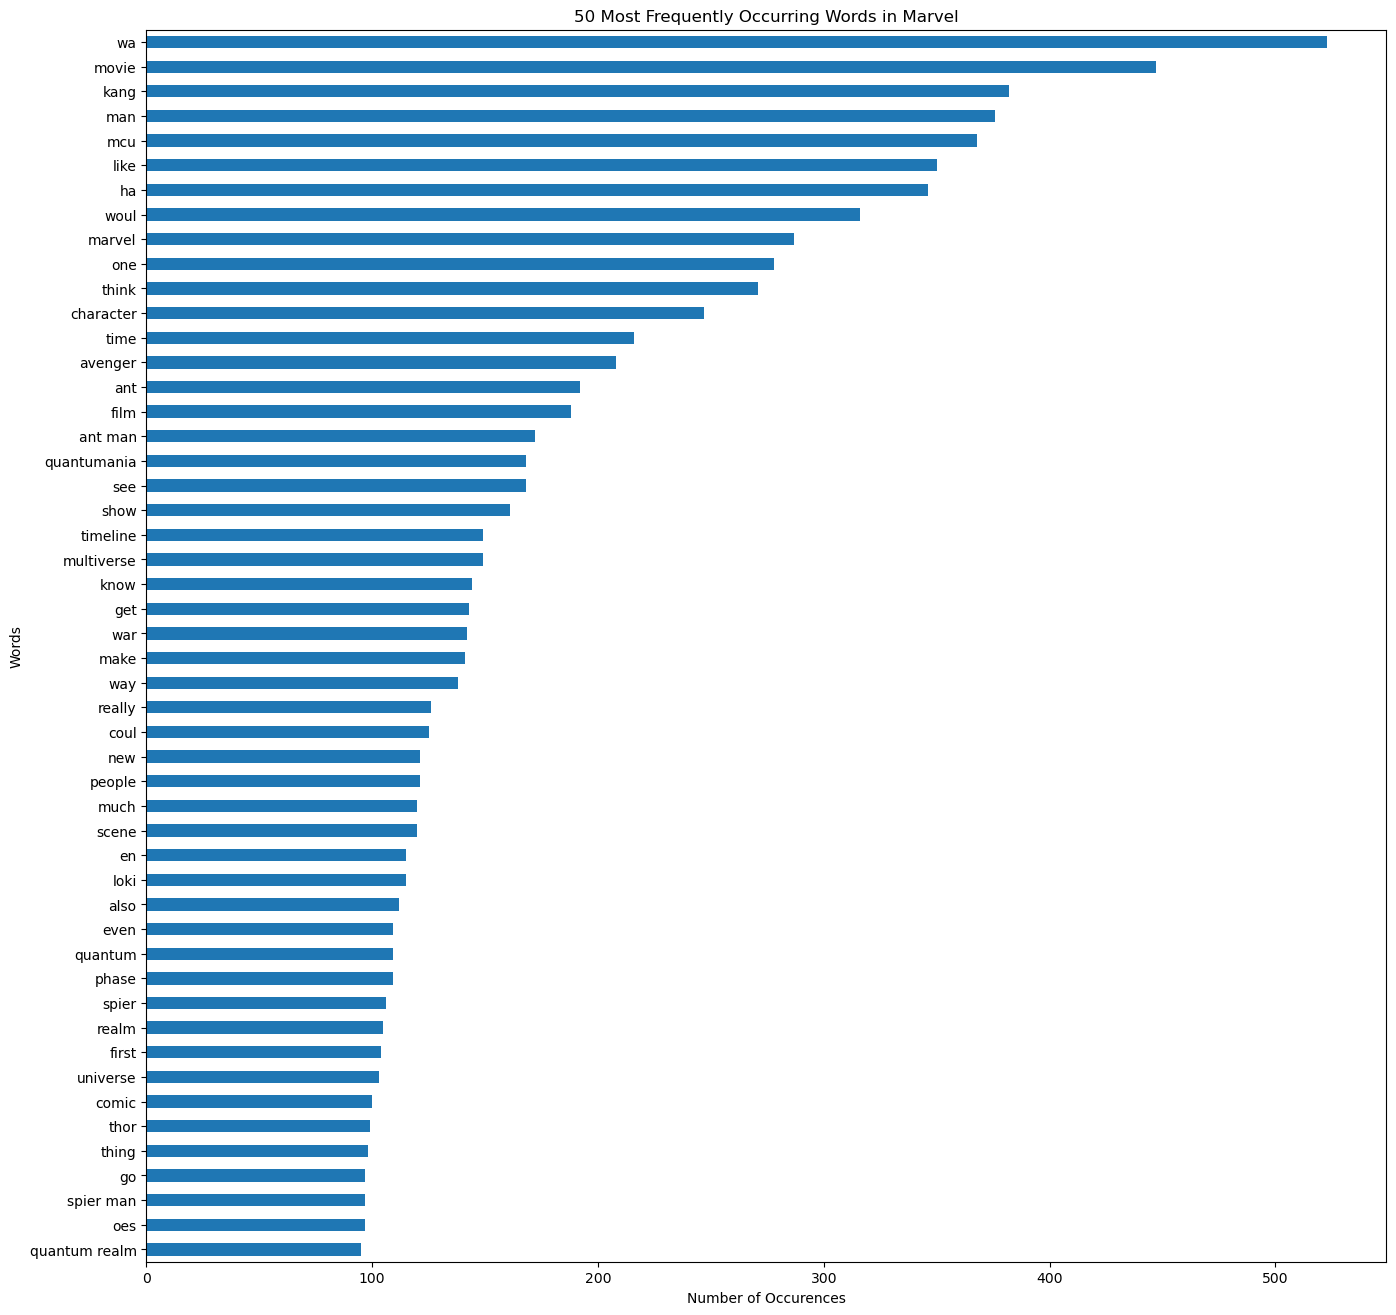

In [27]:
# Plot the 50 most frequently occuring words in Marvel
plt.figure(figsize=(16,16))
top_50_marvel_words = marvel_words.sum().sort_values(ascending=False).head(50)
top_50_marvel_words.sort_values(ascending=True).plot(kind='barh');
plt.title('50 Most Frequently Occurring Words in Marvel')
plt.ylabel('Words')
plt.xlabel('Number of Occurences');

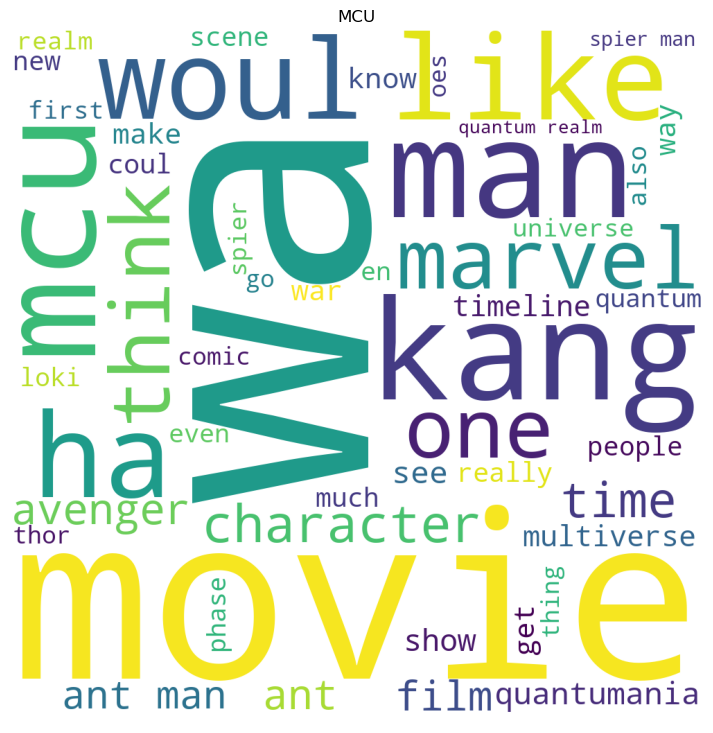

In [28]:
# Create a word cloud 
wordcloud_marvel = WordCloud(max_words=100, width=1000, height=1000, 
                             background_color='white').generate_from_frequencies(top_50_marvel_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud_marvel)
plt.axis('off')
plt.title('MCU');

### EDA on DCEU Data

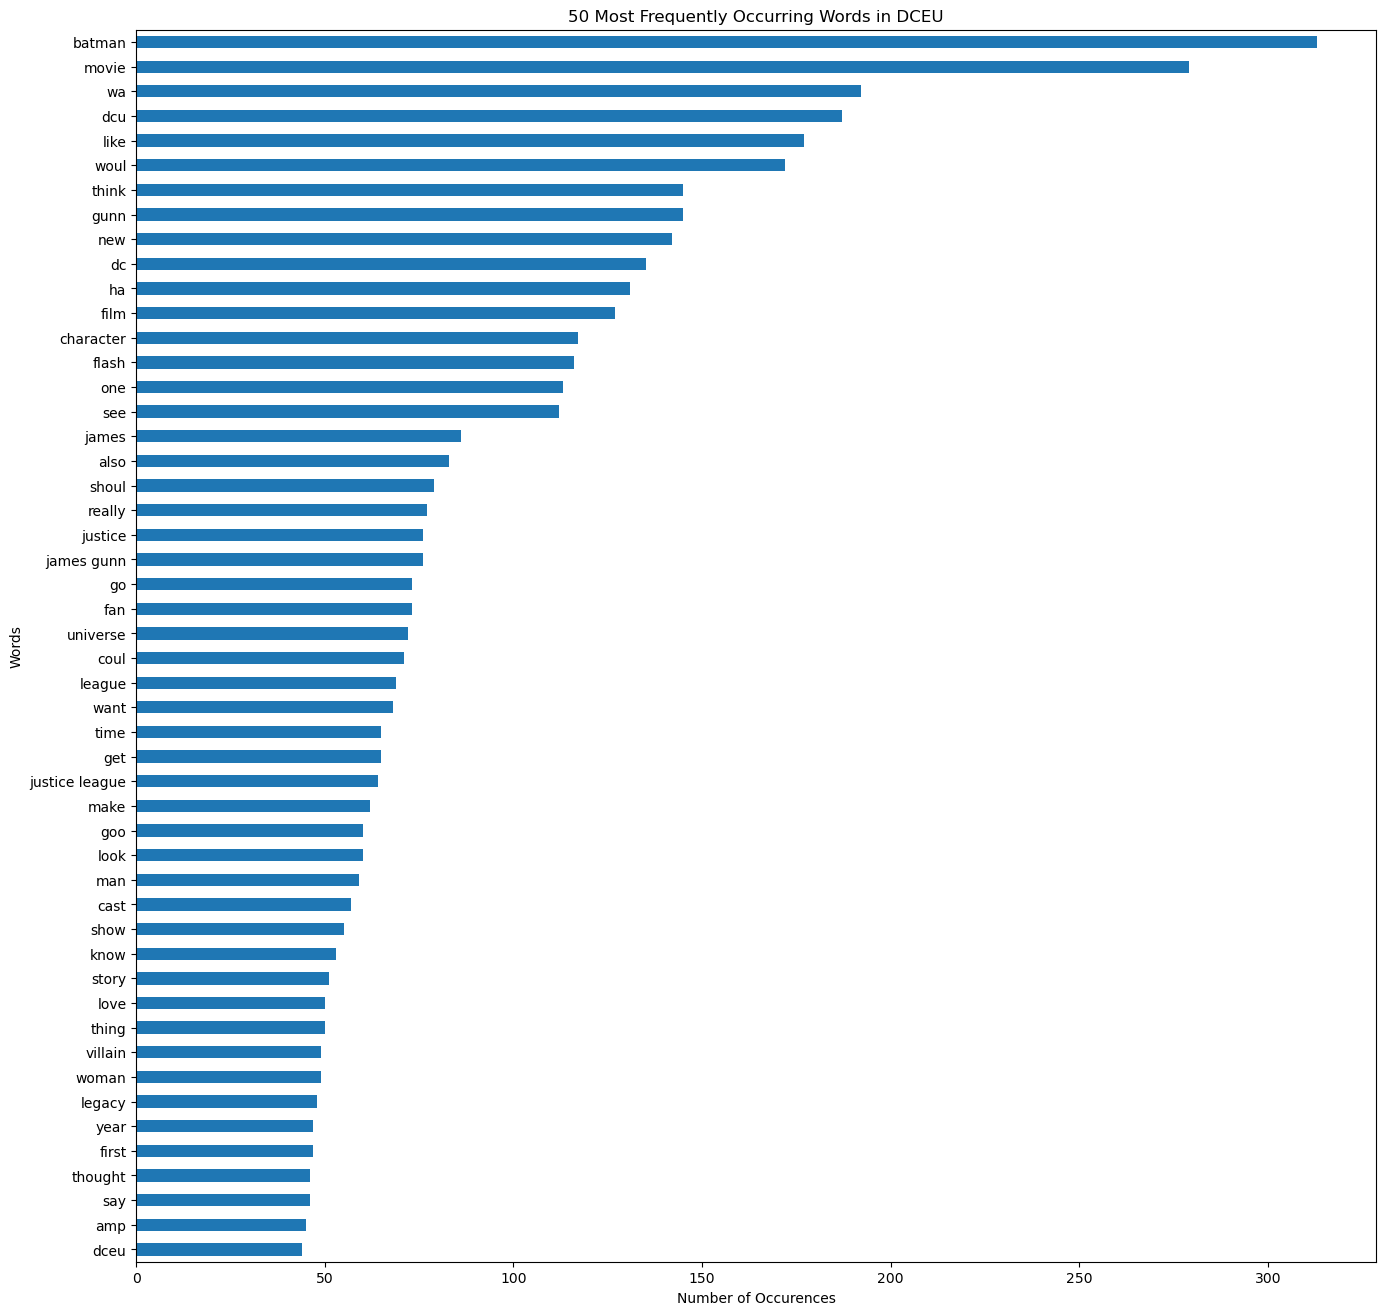

In [29]:
# Plot the 50 most frequently occuring words in DCEU
plt.figure(figsize=(16,16))
top_50_dceu_words = dceu_words.sum().sort_values(ascending=False).head(50)
top_50_dceu_words.sort_values(ascending=True).plot(kind='barh');
plt.title('50 Most Frequently Occurring Words in DCEU')
plt.ylabel('Words')
plt.xlabel('Number of Occurences');

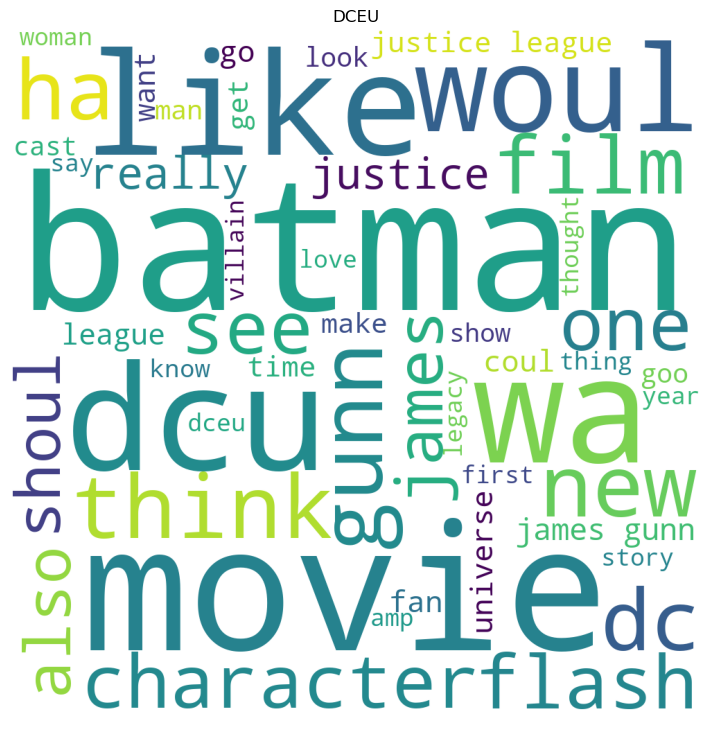

In [30]:
# Create a word cloud 
wordcloud_dceu = WordCloud(max_words=100, width=1000, height=1000, 
                             background_color='white').generate_from_frequencies(top_50_dceu_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud_dceu)
plt.axis('off')
plt.title('DCEU');

From the above bar plots and word clouds, we can see that there are a lot of similar high frequency words between the two topics. As such, before training our models, we will remove these similar high frequency words to improve the quality of words being used to train our models.

### Cleaning up the High Frequency Common Words

Apart from dropping the high frequency common words, we'll drop the giveaway words like marvel, mcu and dcu.

#### Update the stopwords

In [31]:
# Make a copy of the stopwords
stop_words = stopwords.words('english')

# Make list of high frequency common words
common_words = ['wa', 'like', 'woul', 'new', 'ha', 'character', 'see', 'go', 
                'coul', 'make', 'man', 'show', 'know', 'thing', 'mcu', 
                'marvel', 'dcu', 'dc', 'think', 'movie', 'one', 'film']

# Add the common words to the stop words
stop_words.extend(common_words)

#### Clean the Marvel dataset again with the updated stopwords

In [32]:
# Clean the text
marvel['tokens'] = marvel['post'].apply(clean_data)

# Tokenize the text
marvel['tokens'] = marvel['tokens'].apply(tokenize)

# Lemmatize the text
marvel['tokens'] = marvel['tokens'].apply(lemmatize)

# Remove the stop words and common words
marvel['tokens'] = marvel['tokens'].apply(remove_common_words)

In [33]:
# Instantiate a CountVectorizer with ngrams between 1-2
cvec_marvel = CountVectorizer(lowercase=False, ngram_range=(1,2))

In [34]:
# Join the tokenized words
marvel['tokens'] = [" ".join(post) for post in marvel['tokens']]

In [35]:
# Fit the vectorizer and transform the data
cvec_marvel.fit(marvel['tokens'])
marvel_words = cvec_marvel.transform(marvel['tokens'])

In [36]:
# Convert the output into a dataframe
marvel_words = pd.DataFrame(marvel_words.todense(), columns=cvec_marvel.get_feature_names_out())

#### Clean the DCEU dataset again with the updated stopwords

In [37]:
# Clean the text
dceu['tokens'] = dceu['post'].apply(clean_data)

# Tokenize the text
dceu['tokens'] = dceu['tokens'].apply(tokenize)

# Lemmatize the text
dceu['tokens'] = dceu['tokens'].apply(lemmatize)

# Remove the stop words and common words
dceu['tokens'] = dceu['tokens'].apply(remove_common_words)

In [38]:
# Instantiate a CountVectorizer with ngrams between 1-2
cvec_dceu = CountVectorizer(lowercase=False, ngram_range=(1,2))

In [39]:
# Join the tokenized words
dceu['tokens'] = [" ".join(post) for post in dceu['tokens']]

In [40]:
# Fit the vectorizer and transform the data
cvec_dceu.fit(marvel['tokens'])
dceu_words = cvec_dceu.transform(dceu['tokens'])

In [41]:
# Convert the output into a dataframe
dceu_words = pd.DataFrame(dceu_words.todense(), columns=cvec_dceu.get_feature_names_out())

### Plot the Top 50 Words for Marvel and DCEU

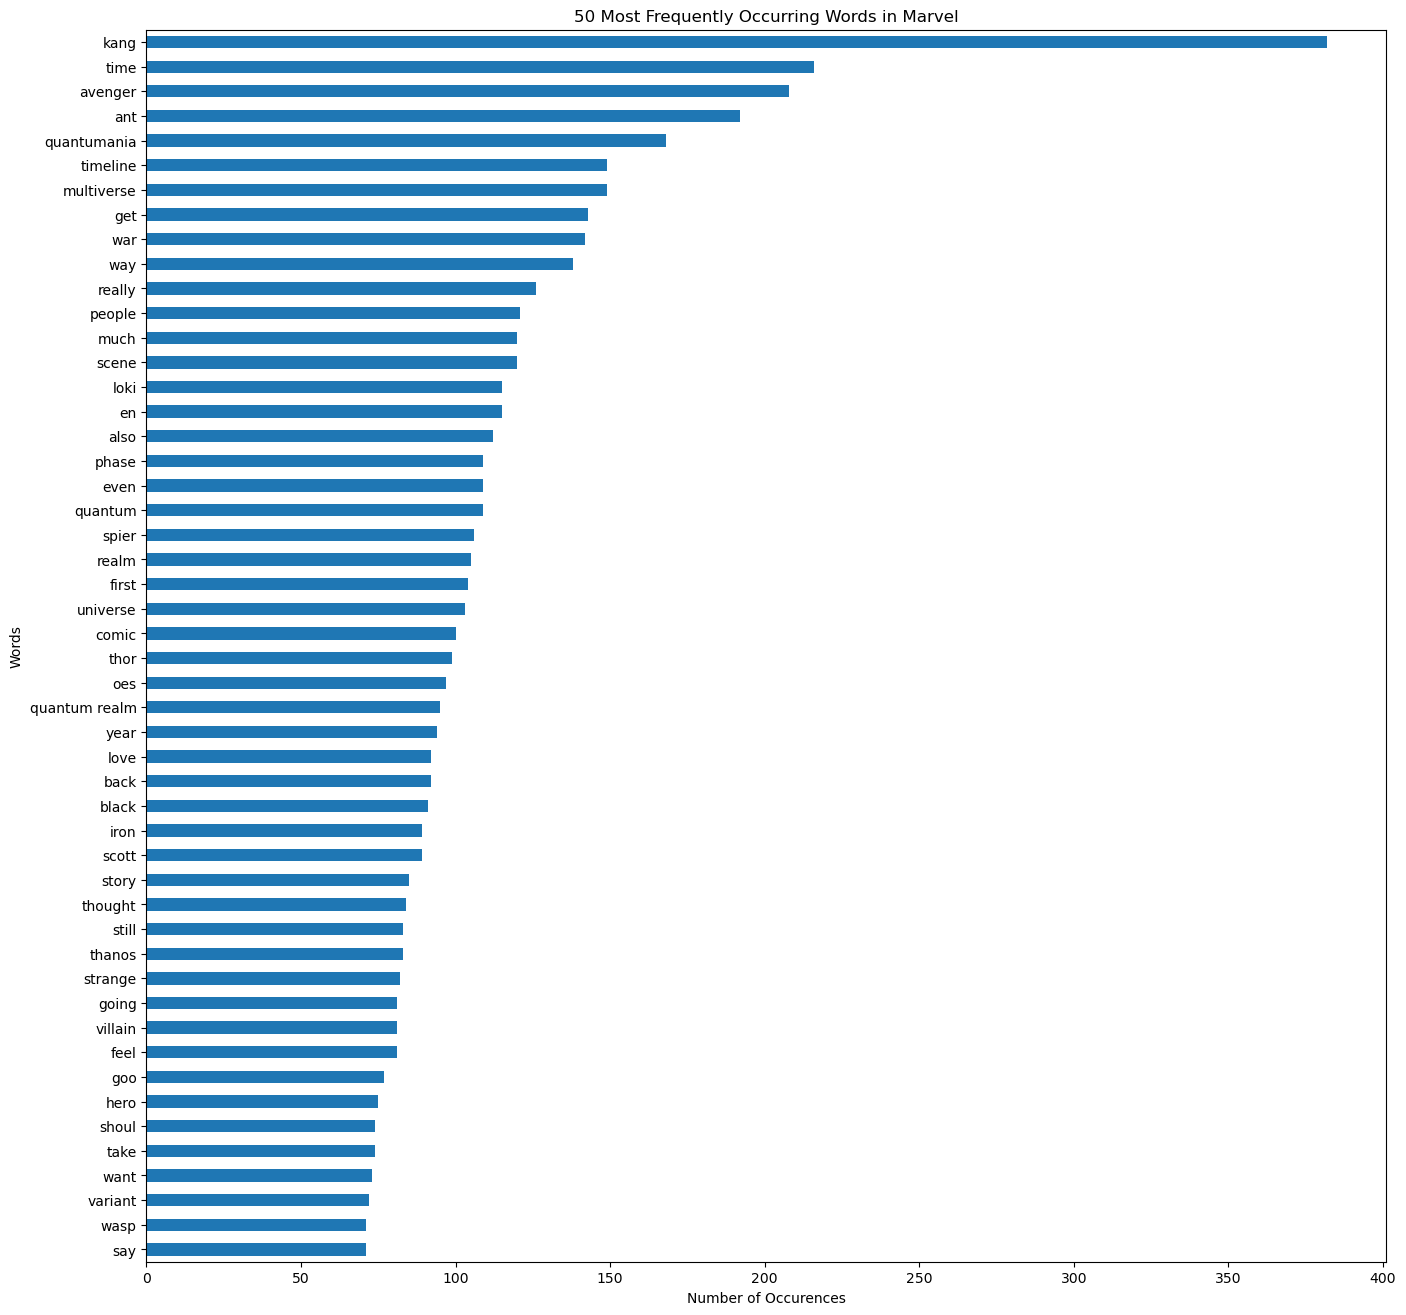

In [42]:
# Plot the 50 most frequently occuring words in Marvel
plt.figure(figsize=(16,16))
top_50_marvel_words = marvel_words.sum().sort_values(ascending=False).head(50)
top_50_marvel_words.sort_values(ascending=True).plot(kind='barh');
plt.title('50 Most Frequently Occurring Words in Marvel')
plt.ylabel('Words')
plt.xlabel('Number of Occurences');

In [43]:
top_50_marvel_words.head()

kang           382
time           216
avenger        208
ant            192
quantumania    168
dtype: int64

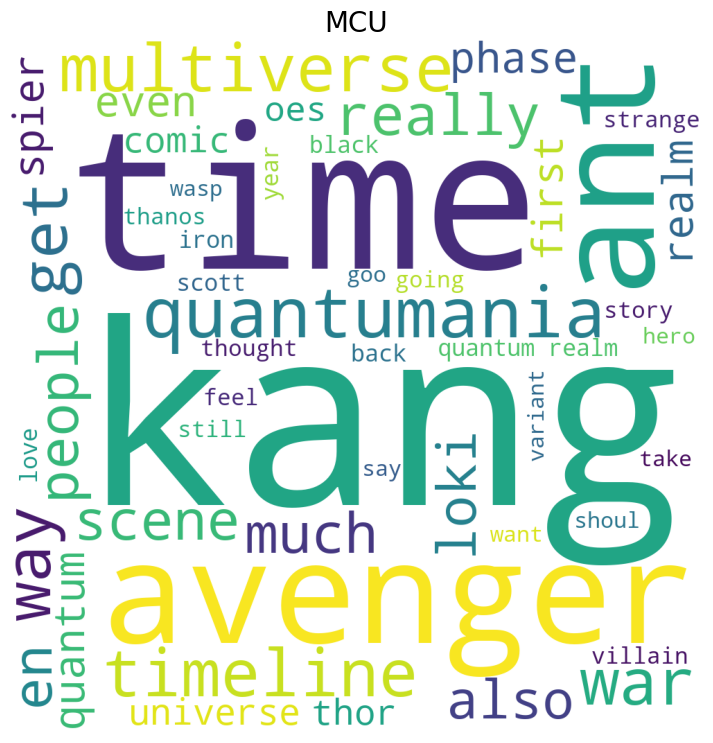

In [44]:
# Create a word cloud 
wordcloud_marvel = WordCloud(max_words=100, width=1000, height=1000, 
                             background_color='white').generate_from_frequencies(top_50_marvel_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud_marvel)
plt.axis('off')
plt.title('MCU', fontsize=20);

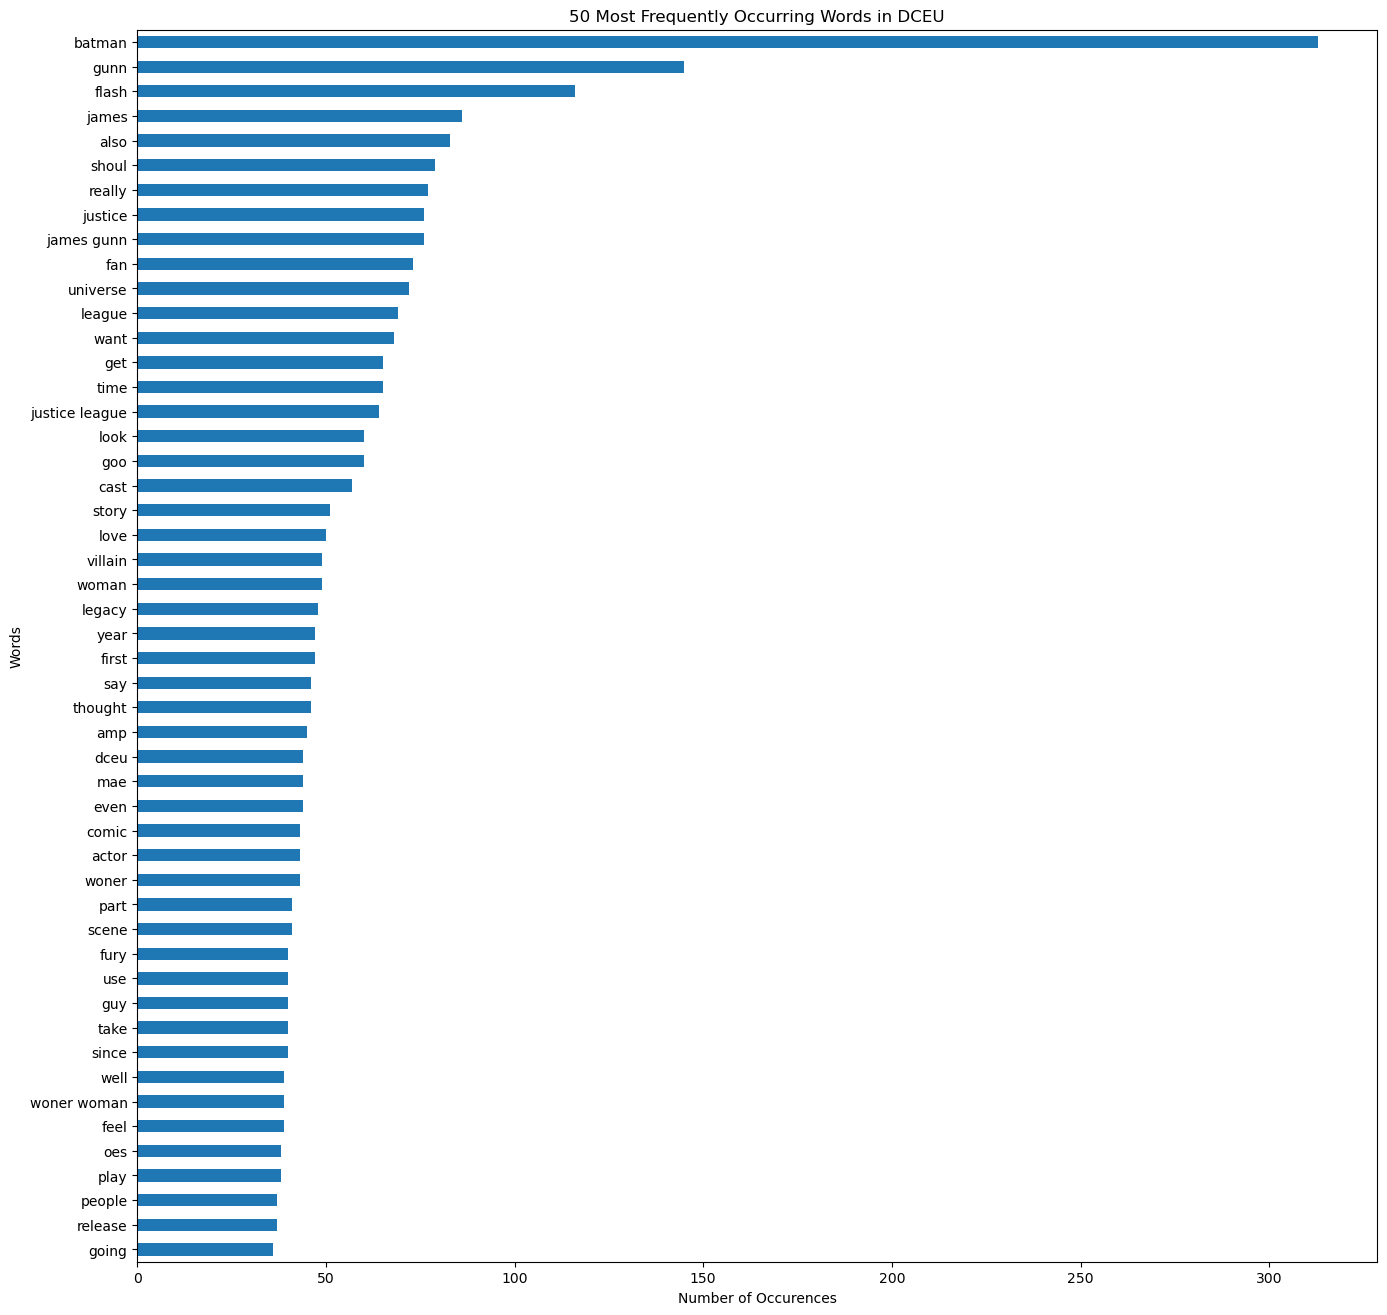

In [45]:
# Plot the 50 most frequently occuring words in DCEU
plt.figure(figsize=(16,16))
top_50_dceu_words = dceu_words.sum().sort_values(ascending=False).head(50)
top_50_dceu_words.sort_values(ascending=True).plot(kind='barh');
plt.title('50 Most Frequently Occurring Words in DCEU')
plt.ylabel('Words')
plt.xlabel('Number of Occurences');

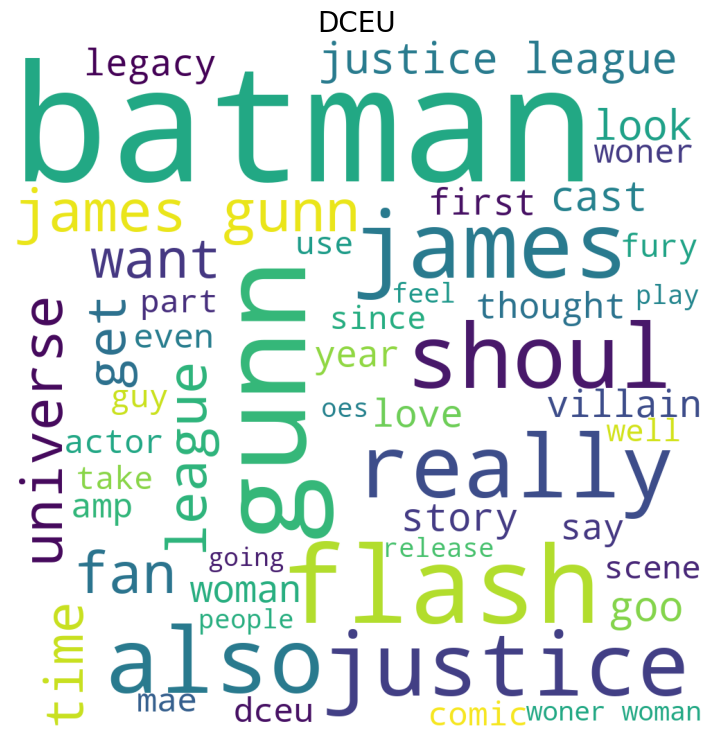

In [46]:
# Create a word cloud 
wordcloud_dceu = WordCloud(max_words=100, width=1000, height=1000, 
                             background_color='white').generate_from_frequencies(top_50_dceu_words)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud_dceu)
plt.axis('off')
plt.title('DCEU', fontsize=20);

From the updated plots and word cloud above, we can see that both Marvel and DCEU have a more distinct word set now. 

## Preprocessing the Data for Modelling

Here, we will preprocess the data into the train and test sets. But first, we will combine both Marvel and DCEU datasets into one dataframe, and create a label for them where
* 1: Marvel
* 0: DCEU

In [47]:
# Combine both datasets
posts = pd.concat([marvel, dceu], axis=0, ignore_index=True)

In [48]:
# Drop the tokens column as we need to process the entire dataset again after the train-test split
posts.drop(columns='tokens', inplace=True)

In [49]:
# Check that both datasets have been combined successfully. 
posts.shape

(1957, 2)

In [50]:
# Take a quick look at the data
posts.head()

,subreddit,post
0,marvelstudios,I hope Layla comes back. Her introduction as t...
1,marvelstudios,Ryan Reynolds Casts Doubt on 'Free Guy' Sequel...
2,marvelstudios,What Does Everyone think of Dr Strange Multive...
3,marvelstudios,Cast this movie with Earth’s Mightiest Muppets-
4,marvelstudios,Okay but hear me out…-


In [51]:
# Under the subreddit column, convert Marvel to 1 and DCEU to 0
posts['subreddit'] = posts['subreddit'].map({'marvelstudios' : 1, 'DC_Cinematic' : 0})

In [52]:
# Check that the mapping was done successfully
posts['subreddit'].unique()

array([1, 0])

### Data Preprocessing for Exploratory Data Analysis

Here, we will split our dataset into the train and test sets, as well as process them further by : 
* Removes special characters
* Tokenizing (converts sentences into individual words, by using ngrams, we can also form tokens with multiple words to give better context)
* Lemmatization (converts different words with the same meaning/intent into the same word)
* Stop word removal (stop words are filler words that do not provide any context and just assist with sentence structure)
* Removing common words between the MCU and DCEU

In [53]:
# Set up data for modelling

X = posts['post']
y = posts['subreddit']

In [54]:
# Check the distribution between the y values
y.value_counts(normalize=True)

1    0.510475
0    0.489525
Name: subreddit, dtype: float64

In [55]:
# Split the data into the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state=42)

In [56]:
# Process the data (both X_train and X_test) for NLP

# Clean the text
X_train = X_train.apply(clean_data)
X_test = X_test.apply(clean_data)

# Tokenize the text
X_train = X_train.apply(tokenize)
X_test = X_test.apply(tokenize)

# Lemmatize the text
X_train = X_train.apply(lemmatize)
X_test = X_test.apply(lemmatize)

# Remove the stop words and common words
X_train = X_train.apply(remove_common_words)
X_test = X_test.apply(remove_common_words)

In [57]:
# Join the tokenized words
X_train = [" ".join(post) for post in X_train]
X_test = [" ".join(post) for post in X_test]

## Export the Data

Now that we have completed the data processing, let's export the train and test data into another notebook to perform the modelling. 

In [58]:
# Use pickle to export the data
pickle.dump(y_test, open('../data/y_test.pkl', 'wb'))
pickle.dump(y_train, open('../data/y_train.pkl', 'wb'))
pickle.dump(X_test, open('../data/x_test.pkl', 'wb'))
pickle.dump(X_train, open('../data/x_train.pkl', 'wb'))

## Next step

With this, we have completed the preprocessing of the data. In the next notebook, we will perform the modelling.